In [ ]:
%%capture 
%pip install matplotlib pandas scikit-learn 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider, FloatText

# Import & clean up dataframe

In [2]:
df = pd.read_csv("testfile_200222-1124_Beugung_0.2.csv", skiprows=2)
df = df.drop("# I:(a.U.)", axis=1)
df = df.rename(columns={"Unnamed: 1": "t", "Unnamed: 2": "U"})
df

,x,y
0,0.00,0.003015
1,0.05,0.002082
2,0.10,0.002641
3,0.15,0.002455
4,0.20,0.002641
...,...,...
192,9.60,0.002082
193,9.65,0.002455
194,9.70,0.001895
195,9.75,0.002268


# Plot

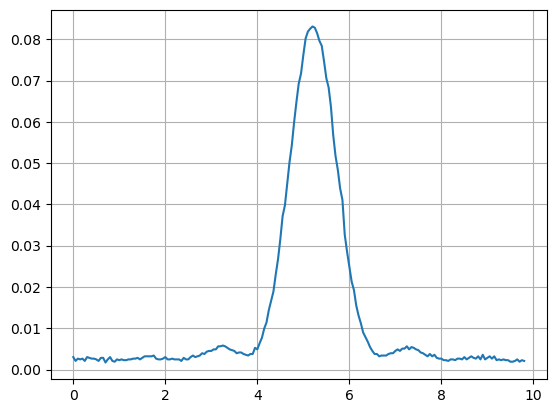

In [3]:
plt.plot(df["x"], df["y"])
plt.grid(True)
plt.xlabel("t [s]")
plt.ylabel("U [V]")
plt.show()

# Simulation

# mit sliders

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
def func(x, a, λ):
    numerator1 = np.sin((a / λ) * np.pi * np.sin(x))
    denominator1 = np.pi * (a / λ) * np.sin(x)
    term = (numerator1 / denominator1)**2
    return term


def plot_func(a, λ, point_x):
    f = lambda x: func(x, a, λ)
    x = np.linspace(-1, 1, 1000)
    y = np.array(list(map(f, x)))
    point_y = f(point_x)

    plt.plot(x, y)

    # Add point to graph
    plt.scatter([point_x], [point_y], color='red')
    print(f"(x|{point_y})")

    plt.grid(True)
    plt.title('Diffraction at Single Slit', fontdict=font)
    #plt.text(0.55, 0.95, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
    plt.xlabel('alpha(rad)', fontdict=font)
    plt.ylabel('I(mV)', fontdict=font)
    plt.show()


a_slider = FloatSlider(value=0.4, min=0.4, max=3, step=0.01, description='a_in_microm:')
λ_slider = FloatSlider(value=0.4, min=0.4, max=0.8, step=0.1, description='λ_in_micro:')
x_value = FloatText(value=0.1, description='x:', disabled=False)

interact(plot_func, a=a_slider, λ=λ_slider, point_x=x_value)
pass